In [1]:
# libraries
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# adding column names and reading the file

column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
data = pd.read_csv('iris/iris.data', delimiter=",", names=column_names)

data.head(10)
data.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
# checking null and na values
data.isnull().sum()
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
# statistics
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='species', ylabel='petal_width'>

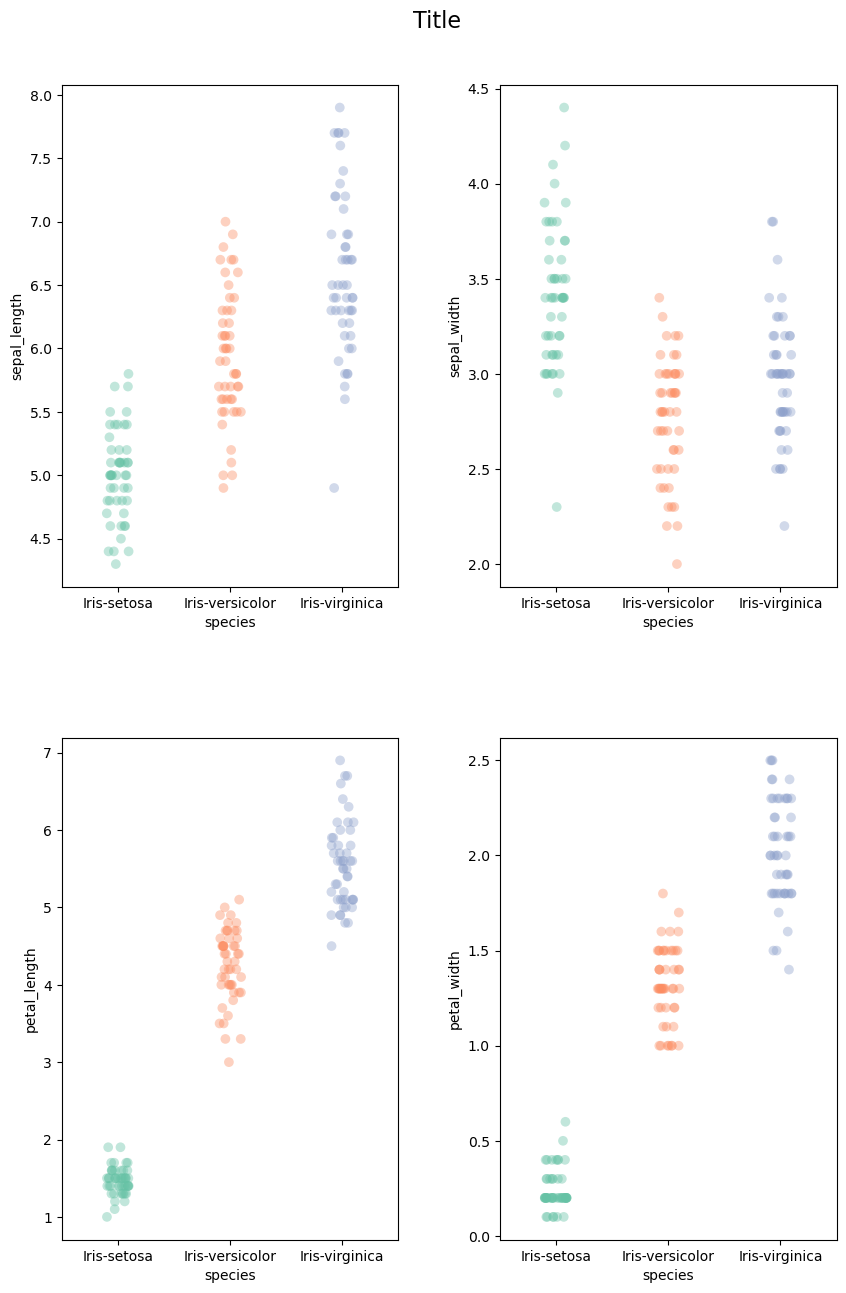

In [15]:
# visualisation

fig, axes = plt.subplots(2, 2, figsize=(10,15))
fig.suptitle("Title", fontsize=16, y=0.93)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

sns.stripplot(data=data, x="species", y="sepal_length", hue="species", palette="Set2", 
              s = 7, alpha = 0.4, legend=False, ax=axes[0,0])
sns.stripplot(data=data, x="species", y="sepal_width", hue="species", palette="Set2", 
              s = 7, alpha = 0.4, legend=False, ax=axes[0,1])
sns.stripplot(data=data, x="species", y="petal_length", hue="species", palette="Set2", 
              s = 7, alpha = 0.4, legend=False, ax=axes[1,0])
sns.stripplot(data=data, x="species", y="petal_width", hue="species", palette="Set2", 
              s = 7, alpha = 0.4, legend=False, ax=axes[1,1])

In [6]:
# splitting the dataset into the train set and the test set

x = data[['sepal_length','sepal_width', 'petal_length', 'petal_width']]
y = data["species"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [7]:
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(38,)

In [8]:
model = LogisticRegression()

In [9]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [10]:
# confusion matrix

cm = confusion_matrix(y_test, y_pred)

In [11]:
# accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model is: {accuracy}")

Accuracy of the model is: 0.9736842105263158


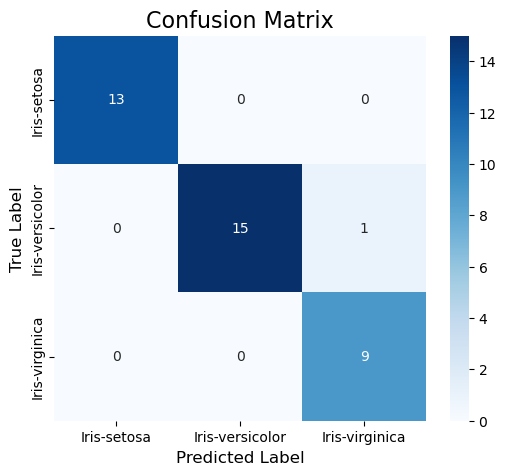

In [12]:
# visialization of confusion matrix - heatmap

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=16)
plt.show()

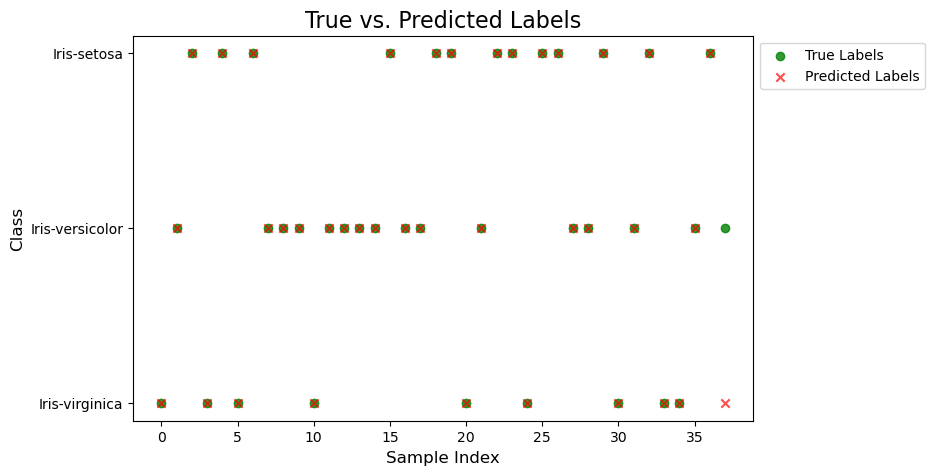

In [13]:
# visualization

plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, color="green", label="True Labels", alpha=0.8)
plt.scatter(range(len(y_pred)), y_pred, color="red", marker="x", label="Predicted Labels", alpha=0.7)

plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Class", fontsize=12)
plt.title("True vs. Predicted Labels", fontsize=16)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()